individual instruction set stands for different movement types.

after evaluation we will get average accuracy and latency for the specific kind of motion

In [7]:
import pandas as pd
import os
import math
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import time



In [3]:

def distance(x, y):
    return math.sqrt((x[0]-x[1])**2+(y[0]-y[1])**2)


In [10]:

# Get the current working directory
WD = os.getcwd()

screen_width = 2560
screen_height = 1440

x_divisions = 2
y_divisions = 2



instruction_df = pd.read_excel(r"C:\Users\k67885\Documents\EyeGaze\output\Game_Horizontal_Medium_1738074854.xlsx")    # need to be configured later
observation_df = pd.read_csv(r"C:\Users\k67885\Documents\EyeGaze\output\GameVideo_Horizontal_Medium1738074854.avi.csv")


print(instruction_df)
print('\n')
print(observation_df)

time_levels=3    # vgoof, good, ok, 
time_window = 3  # time_period of  a time level,  if the    
time_out = time_levels*time_window
max_accuracy = 2000

latency = list()
hit_accuracy = list()
hit_x = list()
hit_y = list()
hit_time = list()

accuracy_threshold = 1600  # maximum accuracy is 2000 that is if the instruction coordinates are followed exactly
movement_type = ""   # it could be fixation,saccades, smooth pursuit, vergence, microssaccades, nystagmus

for i in range(len(instruction_df['time'])):
    for j in range(i,len(observation_df['time'])):

        if(observation_df['time'][j]>instruction_df['time'][i]+time_out): 
                break
        
        t1 = instruction_df['time'][i]
        t2 = observation_df['time'][j]

        x1 = instruction_df['x_cordinate'][i]
        x2 = observation_df['x_cordinate'][j]
        x = [x1,x2]

        y1 = instruction_df['y_cordinate'][i]
        y2 = observation_df['y_cordinate'][j]
        y = [y1,y2]
        
        accuracy = max_accuracy - distance(x,y)  # maximum accuracy is defined to be 2000
        if(accuracy>accuracy_threshold):
                hit_accuracy.append(accuracy)
                latency.append(t2-t1)
                hit_x.append(x2)
                hit_y.append(y2)
                hit_time.append(t2)
                break
avg_accuracy = sum(hit_accuracy)/len(instruction_df['time'])
print(f"hit_accuracy: {hit_accuracy}")
print(f"avg_accuracy: {avg_accuracy}")    

avg_latency = sum(latency)/len(instruction_df['time'])
print(f"latency: {latency}")
print(f"avg_latency: {avg_latency}")    
print(f"{hit_x},{hit_y}")   
print(f"{hit_time}") 

    

          
    

     Frame   time  x_cordinate  y_cordinate  Speed_X  Speed_Y
0        1   0.00          406          300        6        6
1        2   0.40          412          300        6        6
2        3   0.45          418          300        6        6
3        4   0.50          424          300        6        6
4        5   0.55          430          300        6        6
..     ...    ...          ...          ...      ...      ...
385    386  19.78         2368          320       -6        6
386    387  19.83         2362          320       -6        6
387    388  19.88         2356          320       -6        6
388    389  19.93         2350          320       -6        6
389    390  19.98         2344          320       -6        6

[390 rows x 6 columns]


     Frame   time  Pitch (rad)  Yaw (rad)  Pitch (deg)  Yaw (deg)  \
0        0   0.00    -0.267198  -0.934340   -15.309325 -53.533722   
1        1   0.05    -0.512476  -0.868345   -29.362728 -49.752518   
2        2   0.10    -0

In [11]:
colormap = cm.viridis


color = [i/2000 for i in hit_accuracy]
color = [colormap(i) for i in color]

print(color)


[(np.float64(0.565498), np.float64(0.84243), np.float64(0.262877), np.float64(1.0)), (np.float64(0.575563), np.float64(0.844566), np.float64(0.256415), np.float64(1.0)), (np.float64(0.575563), np.float64(0.844566), np.float64(0.256415), np.float64(1.0)), (np.float64(0.585678), np.float64(0.846661), np.float64(0.249897), np.float64(1.0)), (np.float64(0.585678), np.float64(0.846661), np.float64(0.249897), np.float64(1.0)), (np.float64(0.595839), np.float64(0.848717), np.float64(0.243329), np.float64(1.0)), (np.float64(0.595839), np.float64(0.848717), np.float64(0.243329), np.float64(1.0)), (np.float64(0.595839), np.float64(0.848717), np.float64(0.243329), np.float64(1.0)), (np.float64(0.606045), np.float64(0.850733), np.float64(0.236712), np.float64(1.0)), (np.float64(0.606045), np.float64(0.850733), np.float64(0.236712), np.float64(1.0)), (np.float64(0.616293), np.float64(0.852709), np.float64(0.230052), np.float64(1.0)), (np.float64(0.616293), np.float64(0.852709), np.float64(0.230052)

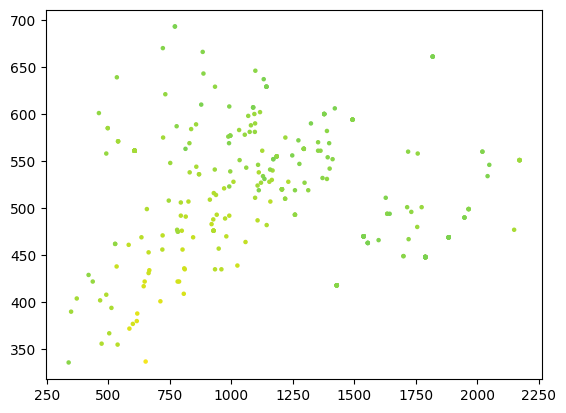

In [12]:

plt.scatter(hit_x,hit_y, s=5, c=color)
plt.show()

In [13]:
print(f"type: {movement_type}")
print(f"avg_accuracy: {avg_accuracy}")
print(f"avg_latency: {avg_latency}")



type: 
avg_accuracy: 1409.4297080443052
avg_latency: -0.12684615384615375


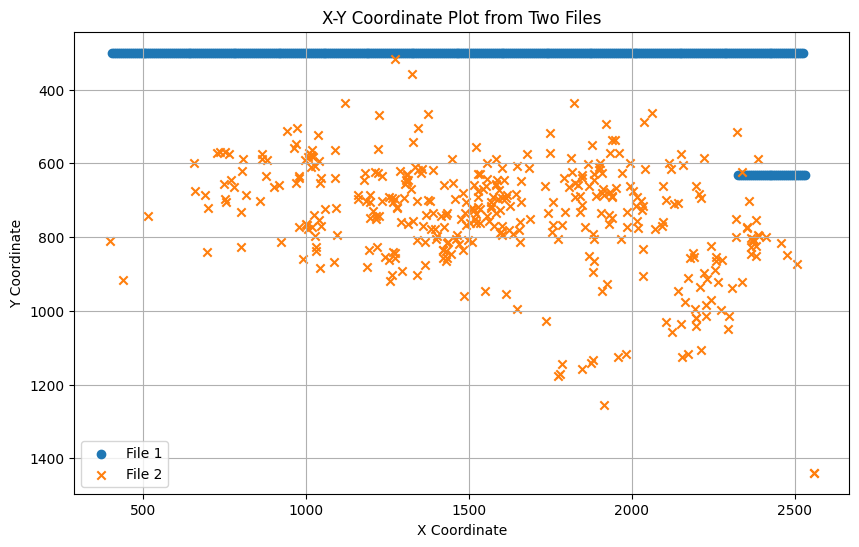

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the first file (replace 'file1.csv' with your file path)
file1 = r"C:\Users\k67885\Documents\EyeGaze\output\Game_Horizontal_Medium_1738079657.xlsx"
data1 = pd.read_excel(file1)

# Load the second file (replace 'file2.csv' with your file path)
file2 = r"C:\Users\k67885\Documents\EyeGaze\output\GameVideo_Horizontal_Medium1738079657.avi.csv"
data2 = pd.read_csv(file2)

# Assuming the files have columns 'x' and 'y'
x1, y1 = data1['ScreenX'], data1['ScreenY']
x2, y2 = data2['ScreenX'], data2['ScreenY']

# Create the plot
plt.figure(figsize=(10, 6))

# Plot data from the first file
plt.scatter(x1, y1, label='File 1', marker='o')

# Plot data from the second file
plt.scatter(x2, y2, label='File 2', marker='x')
plt.gca().invert_yaxis()

# Add labels, title, and legend
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('X-Y Coordinate Plot from Two Files')
plt.legend()
plt.grid()

# Show the plot
plt.show()